# Principal Component Analysis

## plot libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.size'] = 14

## source dataset

In [2]:
import pandas as pd
import dataframe_image as dfi

# https://www.kaggle.com/datasets/saurabh00007/iriscsv
filename = 'Iris.csv'
df = pd.read_csv(filename, index_col=0)
dfi.export(df.head(), 'table_001_iris.png')
df.head()

[0105/113309.773741:WARNING:sandbox_linux.cc(380)] InitializeSandbox() called with multiple threads in process gpu-process.
[0105/113309.792923:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0105/113309.949482:INFO:headless_shell.cc(623)] Written to file /tmp/tmpu9mk_j9q/temp.png.


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


## specify columns for x and y

In [3]:
cols_x = list(df.columns[0:4])
print('cols_x', cols_x)
col_y = df.columns[4]
print('col_y', col_y)

cols_x ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
col_y Species


## Scatter plots

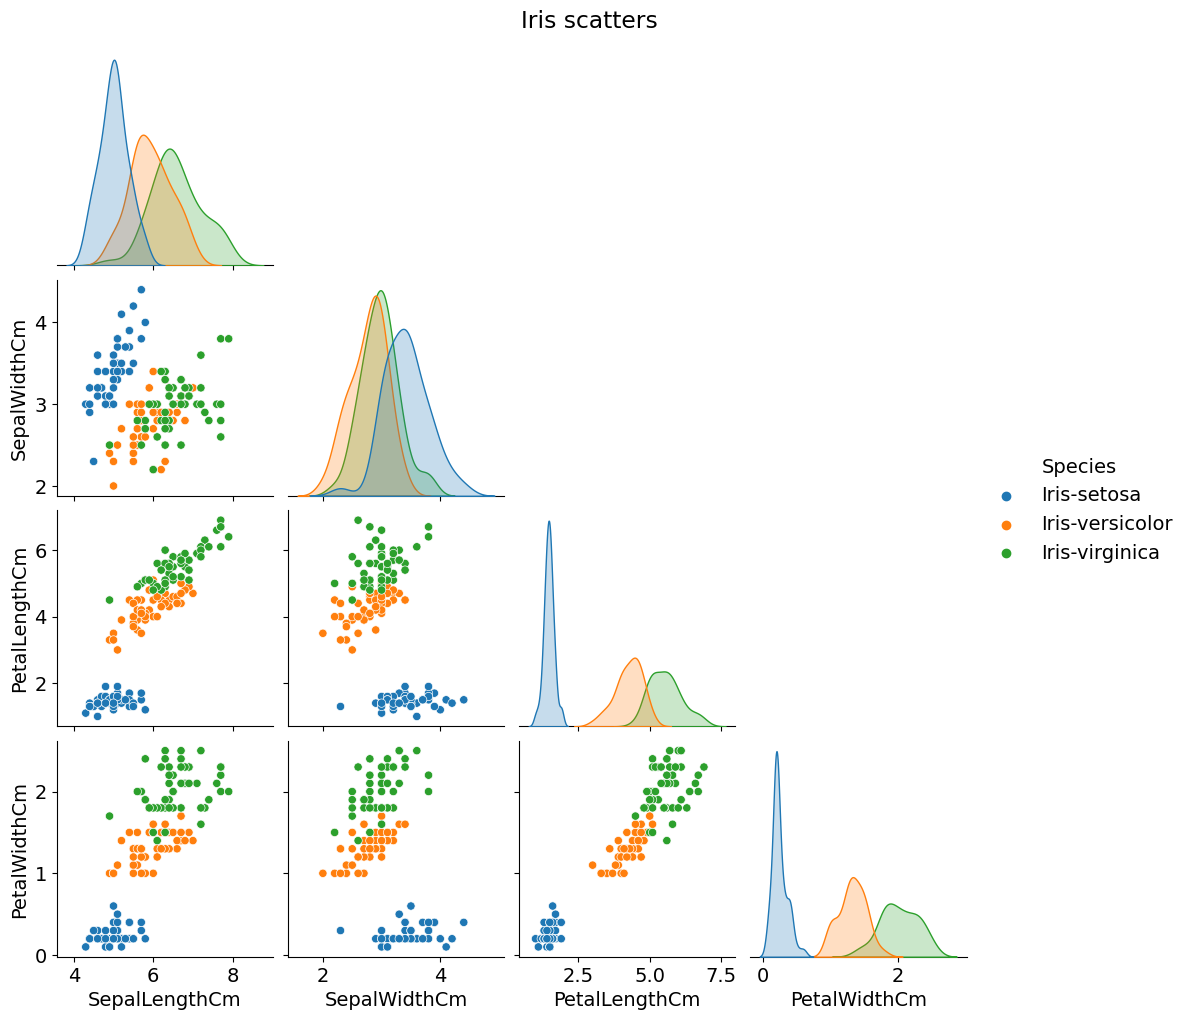

In [4]:
g = sns.pairplot(df, hue=col_y, corner=True)
g.fig.suptitle('Iris scatters', y=1.02)

plt.savefig('iris_001_scatter.png')
plt.show()

# PCA

## Model pipeline（モデルのパイプライン）

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('PCA', PCA()),
])

In [6]:
features = df[cols_x]
pipe.fit(features)

Pipeline(steps=[('scaler', StandardScaler()), ('PCA', PCA())])

## Cumulative Contribution Ratio（累積寄与率）

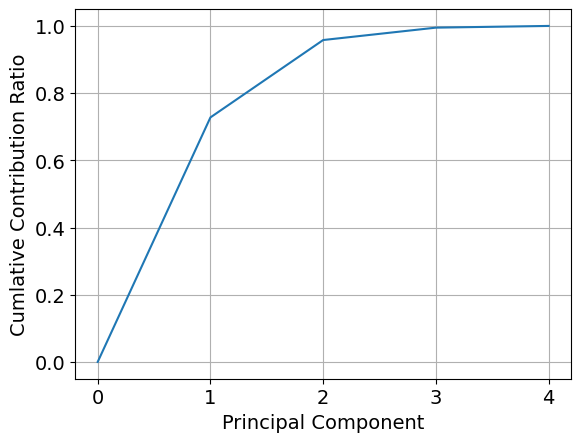

In [7]:
import numpy as np
import matplotlib.ticker as ticker

contribution_ratios = pipe['PCA'].explained_variance_ratio_
cumulative_contribution_ratios = np.hstack([0, contribution_ratios.cumsum()])

fig, ax = plt.subplots()
ax.plot(cumulative_contribution_ratios)
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumlative Contribution Ratio')

# this locator puts ticks at regular intervals
loc = ticker.MultipleLocator(base=1.0)
ax.xaxis.set_major_locator(loc)

plt.grid()
plt.savefig('iris_002_contrib.png')
plt.show()

## Score（主成分得点）

In [8]:
scores = pipe.transform(features)
df_pca = pd.DataFrame(
    scores,
    columns=["PC{}".format(x + 1) for x in range(scores.shape[1])],
    index=df.index
)
df_pca.insert(0, col_y, df[col_y].copy())

dfi.export(df_pca.head(), 'table_002_iris_PCA.png')
df_pca.head()

[0105/113312.178118:WARNING:sandbox_linux.cc(380)] InitializeSandbox() called with multiple threads in process gpu-process.
[0105/113312.191207:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0105/113312.352892:INFO:headless_shell.cc(623)] Written to file /tmp/tmpjwwj97qe/temp.png.


,Species,PC1,PC2,PC3,PC4
Id,,,,,
1,Iris-setosa,-2.264542,0.505704,-0.121943,-0.023073
2,Iris-setosa,-2.086426,-0.655405,-0.227251,-0.103208
3,Iris-setosa,-2.367950,-0.318477,0.051480,-0.027825
4,Iris-setosa,-2.304197,-0.575368,0.098860,0.066311
5,Iris-setosa,-2.388777,0.674767,0.021428,0.037397


## Scatter for PCs

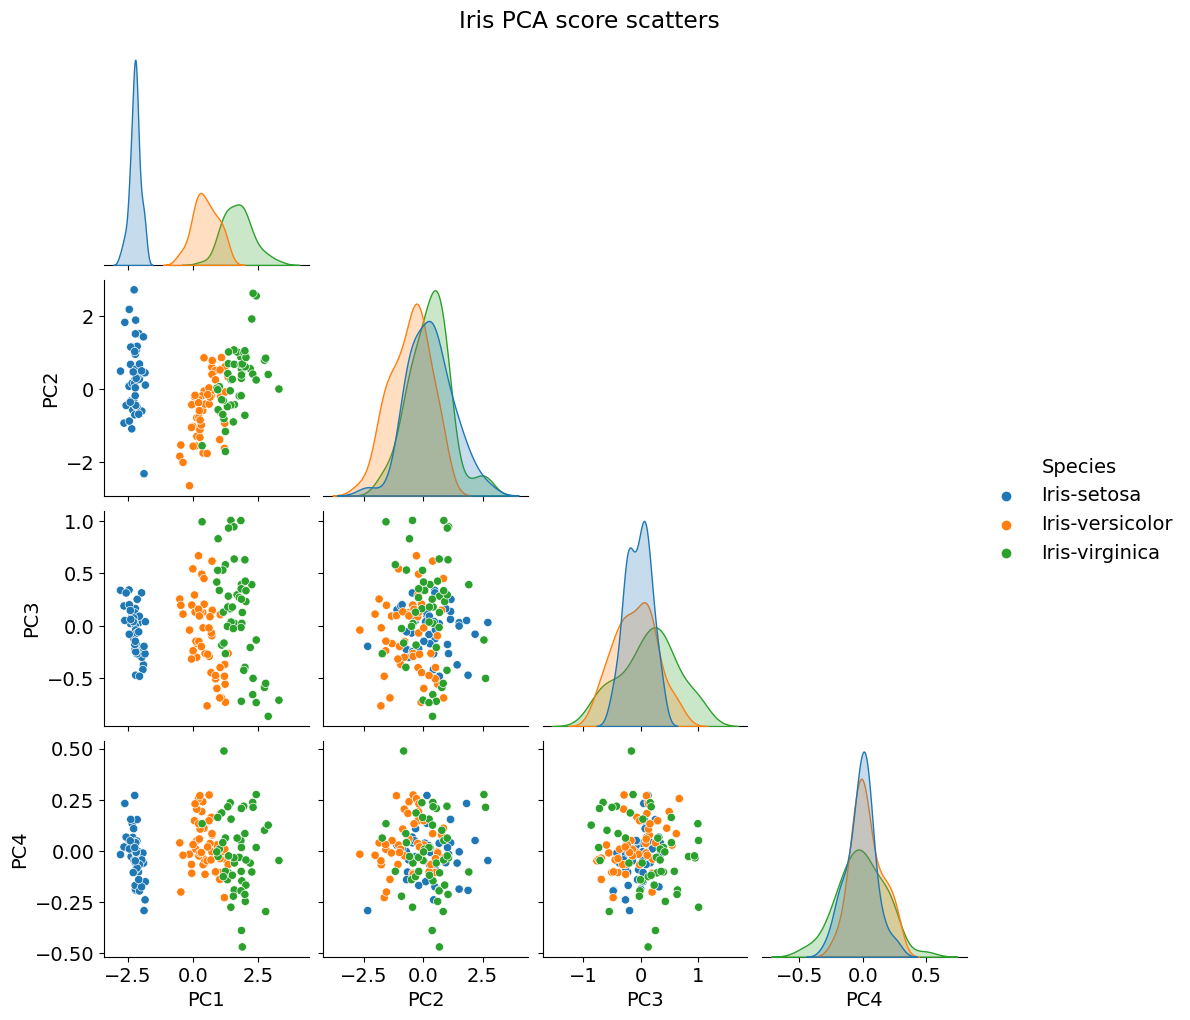

In [9]:
g = sns.pairplot(df_pca, hue=col_y, corner=True)
g.fig.suptitle('Iris PCA score scatters', y=1.02)

plt.savefig('iris_003_PCA_scatter.png')
plt.show()

## Loading（主成分負荷量）

主成分軸（PC1 と PC2）への寄与を確認

In [10]:
components = pipe['PCA'].components_
df_load = pd.DataFrame(components.T,  index=features.columns, columns=["PC{}".format(x + 1) for x in range(len(components))])

dfi.export(df_load, 'table_003_iris_PCA_loading.png')
df_load

[0105/113314.374916:WARNING:sandbox_linux.cc(380)] InitializeSandbox() called with multiple threads in process gpu-process.
[0105/113314.388432:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0105/113314.549785:INFO:headless_shell.cc(623)] Written to file /tmp/tmp_cexe0q6/temp.png.


,PC1,PC2,PC3,PC4
SepalLengthCm,0.522372,0.372318,-0.721017,-0.261996
SepalWidthCm,-0.263355,0.925556,0.242033,0.124135
PetalLengthCm,0.581254,0.021095,0.140892,0.801154
PetalWidthCm,0.565611,0.065416,0.633801,-0.523546


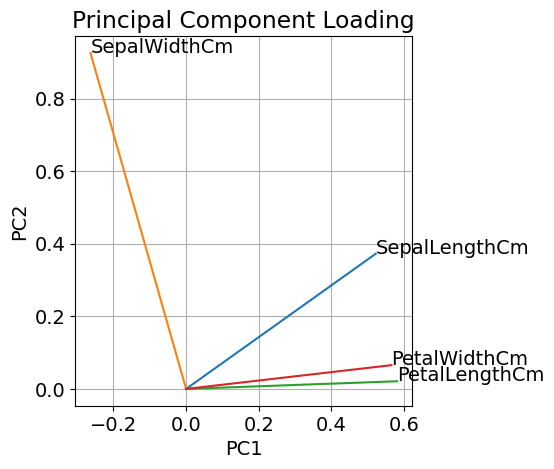

In [11]:
pc_x = 'PC1'
pc_y = 'PC2'

fig, ax = plt.subplots()
for x, y, name in zip(df_load[pc_x], df_load[pc_y], df_load.index):
    ax.plot([0, x], [0, y])
    ax.text(x, y, name)

ax.set_xlabel(pc_x)
ax.set_ylabel(pc_y)
ax.set_title('Principal Component Loading')
ax.set_aspect('equal')

plt.grid()
plt.savefig('iris_004_loading.png')
plt.show()